In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
class KMeans:
    
    def __init__(self, k, maxIters=100):
        
        self.k = k
        self.maxIters = maxIters
        self.centroids = []
        self.membership = []
    
    def fit(self, X):
        
        #initialize K cluster centers in range y
        cIndexes = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = [X[cIndexes[i]] for i in range(self.k)]
        
        for i in range(self.maxIters):
            self.membership = [[] for i in range(self.k)]
            for p in X:
                #find cluster that is closest to every point
                closestCluster = self.__getClosestCluster(p)
                #assign each data point to the closest cluster center
                self.membership[closestCluster].append(p)
            
            #update cluster centers by taking average of all assigned data points
            clusterCentersCurrent = self.centroids
            self.centroids = [np.mean(x, axis=0) for x in self.membership]
            
            #process runs until there are no changes in membership or max # iterations is met
            if np.array_equal(clusterCentersCurrent, self.centroids):
                break
    
    def __getClosestCluster(self, point):
        #Calculate distance between all cluster centers and given point. returns closest cluster to point
        minDistance = None
        for i in range(self.k):
            d = self.__get_distance(point, self.centroids[i])
            if not minDistance or d < minDistance:
                closestCluster = i
                minDistance = d
        
        return closestCluster
                
    
    def predict(self, X):
        return [self.__predict(x) for x in X]
        
    def __predict(self, x):
        #for a single observation, class prediction is associated with closest cluster to the data point of interest
        return self.__getClosestCluster(x)
    
    def __get_distance(self, x1, x2):
        #Calculates euclidian distance between two points
        distance = np.sqrt(np.sum((x1-x2)**2))
        return distance
        

In [32]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [33]:
model = KMeans(k=3)
model.fit(X)
predictions = model.predict(X)

In [34]:
plot = pd.DataFrame(X)
plot['predictions'] = predictions

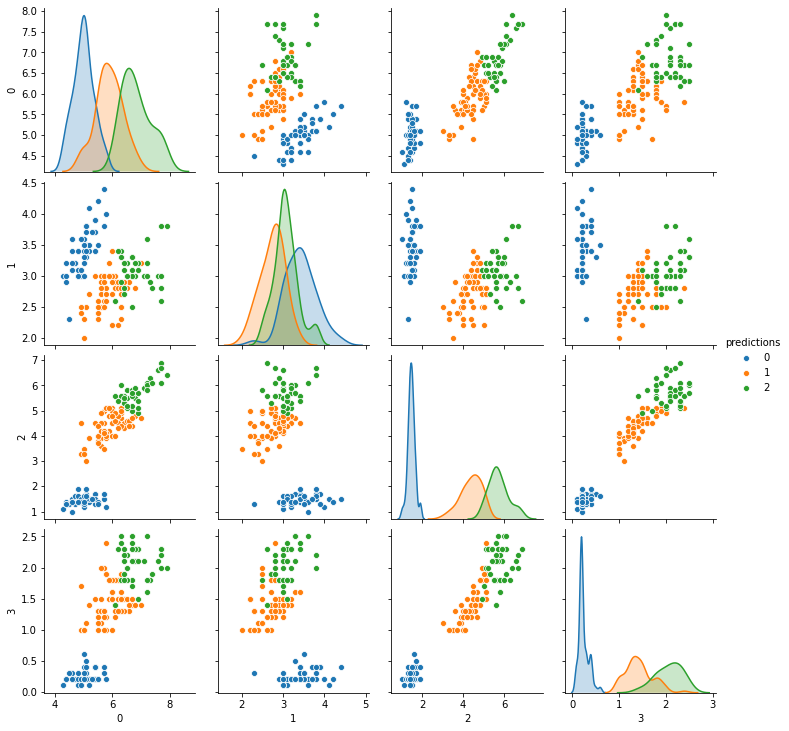

In [35]:
sns.pairplot(plot, hue='predictions')